# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Correlation
### VIDEO: Kendall correlation
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
# generate some data!

rng = np.random.default_rng()
N = 40

# movie ratings
docuRatings = rng.integers(low=1, high=6, size=N)

# education level (1-4, correlated with docuRatings)
# The ceil of the scalar `x` is the smallest integer `i`, such that
# ``i >= x``.
eduLevel = np.ceil((docuRatings + rng.integers(low=1, high=5, size=N))/9 * 4)

# compute the correlations
cr = [0, 0, 0]
cr[0] = stats.kendalltau(eduLevel, docuRatings)[0]
cr[1] = stats.pearsonr(eduLevel, docuRatings)[0]
cr[2] = stats.spearmanr(eduLevel, docuRatings)[0]

# round for convenience
cr = np.round(cr, 4)

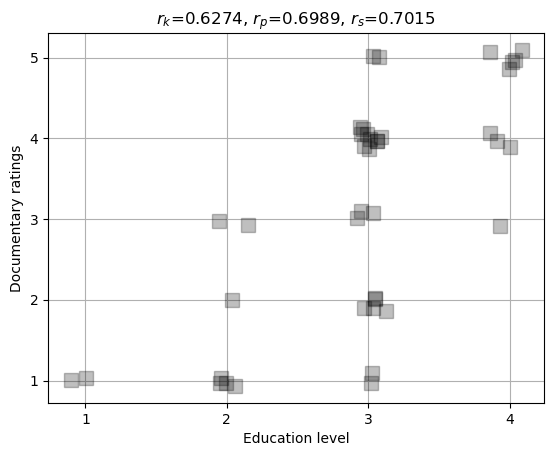

In [5]:
# plot the data
plt.plot(eduLevel + rng.standard_normal(size=N)/15,
         docuRatings + rng.standard_normal(size=N)/15, 'ks',
         markersize=10, markerfacecolor=[0, 0, 0, 0.25])  # (red, green, blue, ALPHA)
plt.xticks(np.arange(4) + 1)
plt.yticks(np.arange(5) + 1)
plt.xlabel('Education level')
plt.ylabel('Documentary ratings')
plt.title(f'$r_k$={cr[0]}, $r_p$={cr[1]}, $r_s$={cr[2]}')
plt.grid()
plt.show()

In [7]:
# correlation estimation errors under H0

numExprs = 1000
nValues = 50
nCategories = 6
c = np.zeros((numExprs, 3))

for i in range(numExprs):
    # create data
    x = rng.integers(low=0, high=nCategories, size=nValues)
    y = rng.integers(low=0, high=nCategories, size=nValues)
    # store correlations
    c[i, :] = [stats.kendalltau(x,y)[0],
               stats.pearsonr(x,y)[0],
               stats.spearmanr(x,y)[0]]
print(c[:5, :])

[[-0.03883612 -0.03418316 -0.04569842]
 [ 0.12116055  0.14606312  0.14707694]
 [-0.13007337 -0.16016845 -0.17179181]
 [-0.0392353  -0.04900207 -0.04410053]
 [ 0.10271361  0.13368523  0.15205605]]


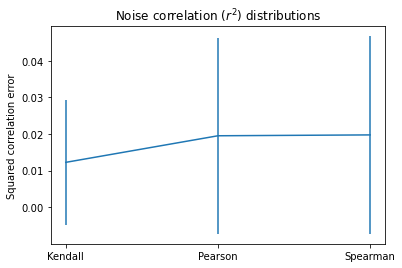

In [6]:
plt.errorbar(range(3), np.mean(c**2, axis=0), yerr=np.std(c**2, ddof=1, axis=0))
plt.xticks(range(3), ('Kendall','Pearson','Spearman'))
plt.ylabel('Squared correlation error')
plt.title('Noise correlation ($r^2$) distributions')
plt.show()

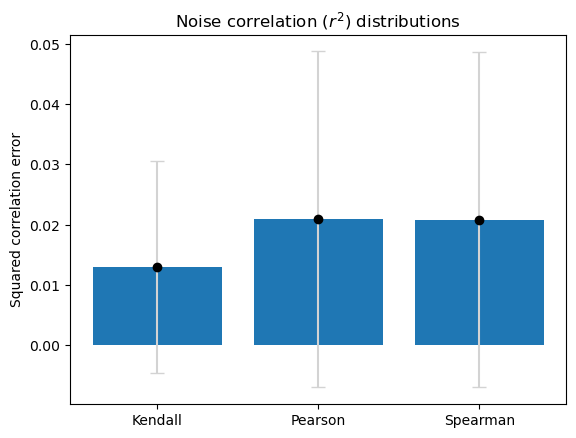

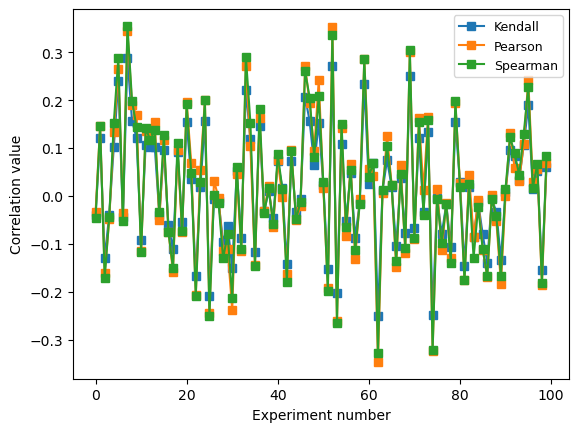

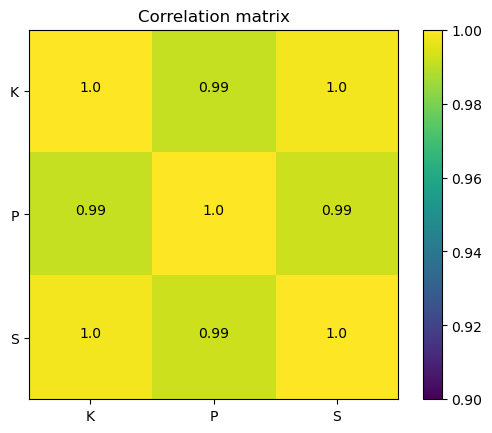

In [15]:
## show the graphs
plt.bar(range(3), np.mean(c**2, axis=0))
# Квадратичная ошибка определения корреляций 3 разных типов.
# Ширина планок погрешностей определяется исходя из величин стандартного отклонения,
# рассчитанного для каждого столбца матрицы c
plt.errorbar(range(3), np.mean(c**2, axis=0), yerr=np.std(c**2, ddof=1, axis=0), fmt='ok',
            ecolor='lightgray', capsize=5)
plt.xticks(range(3), ('Kendall','Pearson','Spearman'))
plt.ylabel('Squared correlation error')
plt.title('Noise correlation ($r^2$) distributions')
plt.show()

# Сравнение рассчитанных коэфф-тов корреляции для первых 100 экспериментов 
plt.plot(c[:100,:], 's-')  # it's kind of remarkable what plot() decides to visualize
plt.xlabel('Experiment number')
plt.ylabel('Correlation value')
plt.legend(('Kendall','Pearson','Spearman'), fontsize=9)
plt.show()

# Корреляционная матрица, построенная для различных столбцов матрицы с
cor_matrix = np.corrcoef(c, rowvar=False)
plt.imshow(cor_matrix, vmin=0.9, vmax=1)
for i in range(3):
    for j in range(3):
        plt.text(i, j, np.round(cor_matrix[i, j], 2), horizontalalignment='center') 
        
plt.xticks(range(3), ['K','P','S'])
plt.yticks(range(3), ('K','P','S'))
plt.colorbar()
plt.title('Correlation matrix')
plt.show()